# 모델 생성 및 검증

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test))

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 3s 53ms/step - loss: 0.6626 - accuracy: 0.6375 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6125 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.6303 - accuracy: 0.6375 - val_loss: 0.6808 - val_accuracy: 0.6000
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 0.6136 - accuracy: 0.6750 - val_loss: 0.6726 - val_accuracy: 0.6500
Epoch 5/200
10/10 [==============================] - 0s 11ms/step - loss: 0.5944 - accuracy: 0.6875 - val_loss: 0.6633 - val_accuracy: 0.6500
Epoch 6/200
10/10 [==============================] - 0s 13ms/step - loss: 0.5756 - accuracy: 0.7000 - val_loss: 0.6516 - val_accuracy: 0.6500
Epoch 7/200
10/10 [==============================] - 0s 20ms/step - loss: 0.5538 - accuracy: 0.7250 - val_loss: 0.6385 - val_accuracy: 0.6500
Epoch 8

# 모델 저장

- 모델을 저장할 때 확장자는 **.hdf5** 사용

In [2]:
# 모델 저장
model.save('model_test.hdf5')

In [3]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('model_test.hdf5')

In [4]:
# 모델 성능 재확인
loss_n, accuracy_n = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_n:.4f}")
print(f"Test Accuracy: {accuracy_n:.4f}")

1/1 [==============================] - 0s 156ms/step - loss: 0.8388 - accuracy: 0.8500
Test Loss: 0.8388
Test Accuracy: 0.8500


# 그래프로 과적합 확인



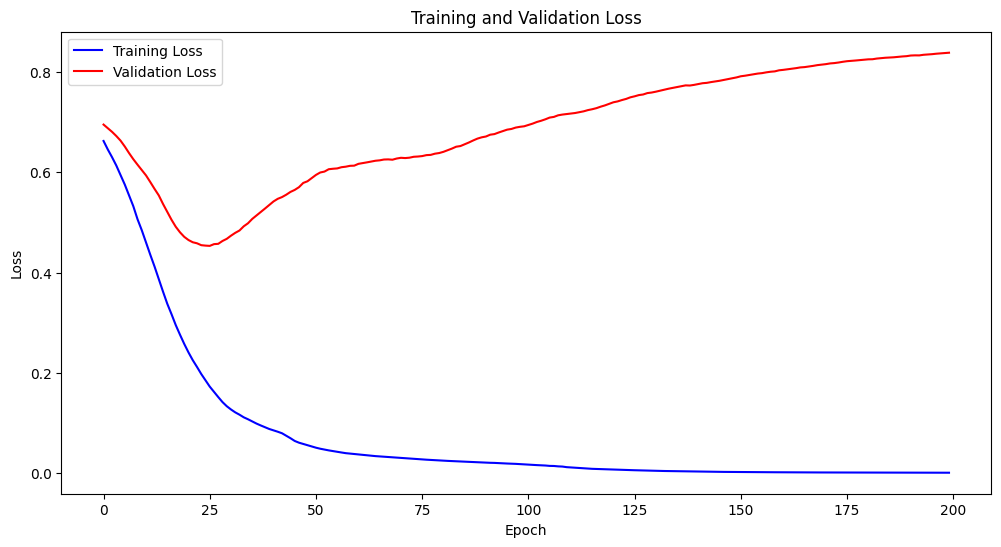

In [5]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# EarlyStopping() 함수
- 텐서플로는 EarlyStopping() 함수 제공

- 학습이 진행되어도 테스트셋 오차가 줄어들지 않으면 학습을 자동으로 멈추게 됨

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 모델 학습 (early stopping 적용)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# K-fold

In [7]:
from sklearn.model_selection import StratifiedKFold

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

val_acc_list = []
fold_num = 1
results = {}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 구조 정의
    model = Sequential([
        Dense(128, activation='relu', input_dim=20),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 검증 데이터로 평가
    _, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_acc_list.append(val_acc)

    # 각 fold의 결과 저장
    results[f"Fold {fold_num} Accuracy"] = val_acc
    fold_num += 1

In [8]:
results

# K-fold 결과 출력
print(f"5-fold Validation Accuracy: {np.mean(val_acc_list):.4f} ± {np.std(val_acc_list):.4f}")

5-fold Validation Accuracy: 0.8900 ± 0.0490


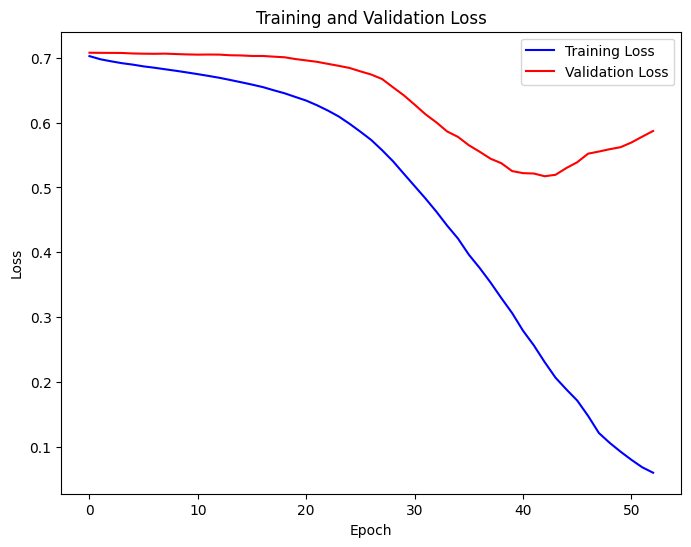

In [10]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(8, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()